# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(42)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
units = 'imperial'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
record=0

print(f'Beginning Data Retrevial')
print(f'------------------------')
    
for city in cities:
    response = requests.get(url+city).json()
#     pprint(response)
   
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record+1
        city_record = response['name']
        print(f'Prossessing Record {record} | {city_record}')
        
    except:
        print('City not found. Skipping...')
        pass

print(f'------------------------')
print(f'Data Retreival Complete')

Beginning Data Retrevial
------------------------
Prossessing Record 1 | Henties Bay
City not found. Skipping...
Prossessing Record 2 | Bethel
Prossessing Record 3 | Saint-François
Prossessing Record 4 | Ushuaia
Prossessing Record 5 | Mar del Plata
Prossessing Record 6 | Kruisfontein
Prossessing Record 7 | Brønnøysund
City not found. Skipping...
Prossessing Record 8 | Yumen
Prossessing Record 9 | Albany
Prossessing Record 10 | Dikson
Prossessing Record 11 | Ossora
Prossessing Record 12 | Vaini
Prossessing Record 13 | Castro
City not found. Skipping...
Prossessing Record 14 | Vanimo
Prossessing Record 15 | San Cristobal
Prossessing Record 16 | Ulladulla
Prossessing Record 17 | ‘Ewa Beach
Prossessing Record 18 | Bluff
Prossessing Record 19 | Departamento de Maldonado
Prossessing Record 20 | Mataura
Prossessing Record 21 | Jamestown
Prossessing Record 22 | Geraldton
Prossessing Record 23 | Punta Arenas
Prossessing Record 24 | Mitú
Prossessing Record 25 | Turan
Prossessing Record 26 | Bred

Prossessing Record 224 | Khovd
Prossessing Record 225 | Meulaboh
Prossessing Record 226 | Pouébo
Prossessing Record 227 | Upernavik
Prossessing Record 228 | Los Andes
Prossessing Record 229 | Leningradskiy
Prossessing Record 230 | Sinnamary
Prossessing Record 231 | Lagoa
Prossessing Record 232 | Makīnsk
Prossessing Record 233 | Gurupá
Prossessing Record 234 | Chinsali
Prossessing Record 235 | Port Elizabeth
Prossessing Record 236 | Ineu
Prossessing Record 237 | Faya
City not found. Skipping...
Prossessing Record 238 | Chara
Prossessing Record 239 | La Unión
Prossessing Record 240 | Narsaq
City not found. Skipping...
Prossessing Record 241 | Shestakovo
Prossessing Record 242 | Newport
City not found. Skipping...
Prossessing Record 243 | Barra de Tecoanapa
Prossessing Record 244 | Lichinga
City not found. Skipping...
Prossessing Record 245 | Namatanai
Prossessing Record 246 | Cabedelo
Prossessing Record 247 | Tongliao
Prossessing Record 248 | Cayenne
Prossessing Record 249 | Longyearbyen

Prossessing Record 443 | Arroyo de la Encomienda
Prossessing Record 444 | Arman'
Prossessing Record 445 | Quatre Cocos
Prossessing Record 446 | Ucar
Prossessing Record 447 | Chamba
Prossessing Record 448 | Buala
Prossessing Record 449 | Ratnagiri
Prossessing Record 450 | Yaan
Prossessing Record 451 | Bereda
Prossessing Record 452 | Adrar
Prossessing Record 453 | Hofn
Prossessing Record 454 | La Santisima Trinidad
Prossessing Record 455 | Kyaukse
Prossessing Record 456 | Stornoway
City not found. Skipping...
Prossessing Record 457 | Juneau
Prossessing Record 458 | General Roca
Prossessing Record 459 | Talen
Prossessing Record 460 | Shingū
Prossessing Record 461 | Mutatá
Prossessing Record 462 | Bonavista
Prossessing Record 463 | Ikare
Prossessing Record 464 | Ilulissat
Prossessing Record 465 | Wad Medani
Prossessing Record 466 | Atar
Prossessing Record 467 | Sistranda
Prossessing Record 468 | Frutigen
City not found. Skipping...
Prossessing Record 469 | Labuhan
Prossessing Record 470 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date
})
weather_df.to_csv(r'../output_data/cities.csv', index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.1160,14.2845,68.0,88,91,5.10,NA,1611716964
1,Bethel,41.3712,-73.4140,28.0,93,90,4.61,US,1611716757
2,Saint-François,46.4154,3.9054,33.8,80,0,5.75,FR,1611716964
3,Ushuaia,-54.8000,-68.3000,39.2,81,75,23.02,AR,1611716749
4,Mar del Plata,-38.0023,-57.5575,71.6,83,75,4.61,AR,1611716964


In [39]:
stats = weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.099162,17.257151,48.388290,75.970588,59.676471,8.325790,1.611717e+09
std,33.145578,88.692192,32.865358,18.695265,39.918957,6.010868,9.228876e+01
min,-54.800000,-179.166700,-47.360000,8.000000,0.000000,0.400000,1.611717e+09
25%,-6.908575,-60.897200,30.200000,70.000000,20.000000,3.520000,1.611717e+09
50%,22.622500,17.954800,61.000000,80.000000,75.000000,6.775000,1.611717e+09
75%,48.690550,99.472150,74.200000,88.000000,99.000000,11.500000,1.611717e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,32.350000,1.611717e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
humidity = weather_df.loc[weather_df['Humidity']>100]
humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [42]:
#  Get the indices of cities that have humidity over 100%.

In [43]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

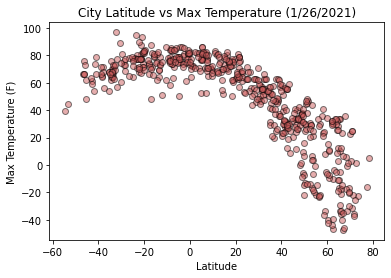

In [44]:
x=weather_df['Lat']
y=weather_df['Max Temp']

plt.scatter(x, y, facecolor = 'indianred', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Max Temperature (1/26/2021)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_max_temp.png')

plt.show()

**City Latitude vs Max Temperature Observations**

The data shown in this graph seem to show a relationship between the latitude of a city and max temperature. Cities at similar latitudes tend to have a similar range of temperatures with only a few outliers. You could infer from this data that if you chose another city at the same latitude as one on the graph, you would get similar max temperature data. 

## Latitude vs. Humidity Plot

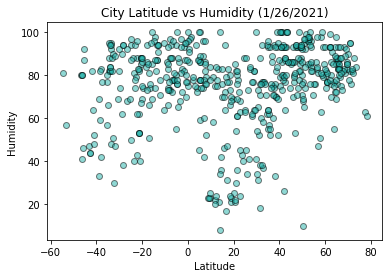

In [45]:
x=weather_df['Lat']
y=weather_df['Humidity']

plt.scatter(x, y, facecolor = 'lightseagreen', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Humidity (1/26/2021)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_humidity.png')

plt.show()

**City Latitude vs Humidity Observations**

The data represented in the graph does not seem to have any patterns. Based on the data shown, we cannot use the latitude of a city as a predictor of the humidity level. This can be supported by the way the data seems fairly evenly distributed across the entire graph.

## Latitude vs. Cloudiness Plot

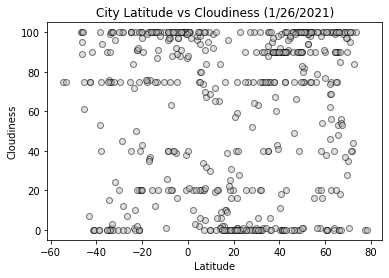

In [46]:
x=weather_df['Lat']
y=weather_df['Cloudiness']

plt.scatter(x, y, facecolor = 'silver', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Cloudiness (1/26/2021)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_cloud.png')

plt.show()

**City Latitude vs Cloudiness Observations**

Based on the data it doesn't seem that you can predict the level of cloudiness based on the latitude of a city. However, there are clusters of data on 100%, 90%, 75%, 40%, 20%, and 0%. This may suggest that areas tend to use measurements with either five or zero on the end more frequently than others when describing the level of cloudiness. It would be interesting to look at reporting standards to see if there were similarities between the cities that are clustered around the values 100%, 90%, 75%, 40%, 20%, and 0%.

## Latitude vs. Wind Speed Plot

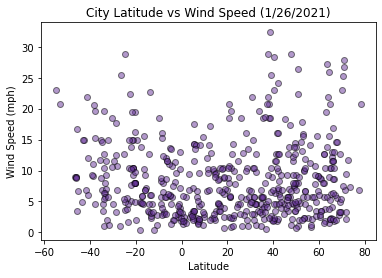

In [47]:
x=weather_df['Lat']
y=weather_df['Wind Speed']

plt.scatter(x, y, facecolor = 'rebeccapurple', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Wind Speed (1/26/2021)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_wind.png')

plt.show()

**City Latitude vs Wind Speed Observations**

There does not seem to be a correlation between latitude and wind speed. The data is clustered fairly evenly across the latitudes and different wind speeds. One observation that may be inferred is that the majority of wind speeds tend to be below 20 mph. 

## Linear Regression

In [48]:
n_hemi = weather_df.loc[(weather_df['Lat'] >= 0) & (weather_df['Lat'] <= 90)]
len(n_hemi)

374

In [49]:
s_hemi = weather_df.loc[(weather_df['Lat'] >= -90) & (weather_df['Lat'] < 0)]
len(s_hemi)

170

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7321215717162585


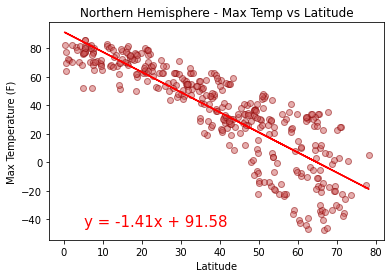

In [50]:
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'indianred', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (5,-45), fontsize=15, color="red")

plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2081015534772225


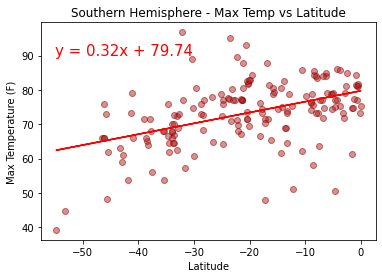

In [51]:
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'firebrick', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")

plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Max Temp vs Latitude**

When comparing these two graphs, there seems to be a much stronger correlation between temperature and latitude in the northern hemisphere. However, the data points are not evenly split between northern and southern hemispheres. This may be causing some skew in the data. Both graphs seem to show that temperatures tend to rise as one moves closer to 0 degrees latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11780639988396341


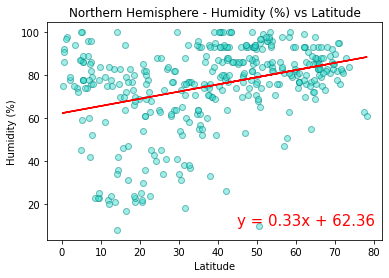

In [52]:
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'turquoise', 
            alpha = .5, edgecolor='teal')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (45,10), fontsize=15, color="red")

plt.title('Northern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11090746256376684


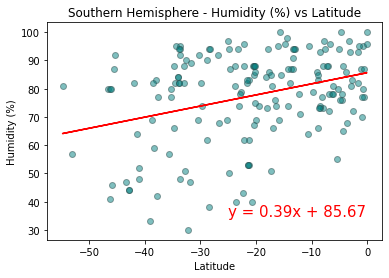

In [55]:
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'teal', 
            alpha = .5, edgecolor='darkslategrey')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-25, 35), fontsize=15, color="red")

plt.title('Southern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_humidity.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Humidity vs Latitude**

The r-squared value is low in both norther and southern hemisphere plots. This indicates that there is a lot of variability in the data. This can lead us to infer that you can not reliably predict the humidity of a given location based on the latitude of the location.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07650749864601161


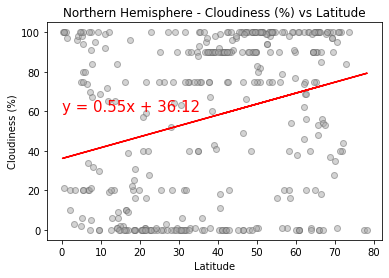

In [56]:
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'darkgray', 
            alpha = .5, edgecolor='dimgray')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,60), fontsize=15, color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_cloud.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05268803672502566


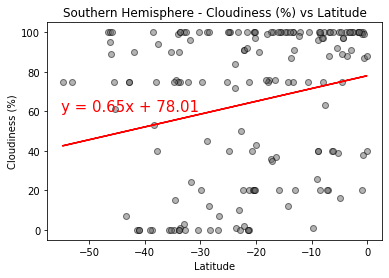

In [57]:
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'dimgray', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 60), fontsize=15, color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_cloud.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Cloudiness vs Latitude**

The r-squared values are very low for these data sets. Using this data, we can infer that latitude is not a good predictor of the cloud cover a particular city will encounter. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.029422039559054328


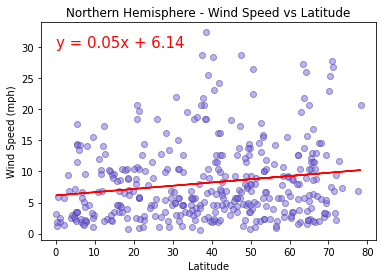

In [61]:
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'mediumslateblue', 
            alpha = .5, edgecolor='darkslateblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,30), fontsize=15, color="red")

plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_wind.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09509450356058095


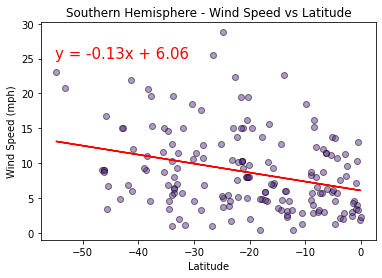

In [60]:
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'rebeccapurple', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_wind.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Wind Speed vs Latitude**

The r-squared value is low for both data sets. This seems to indicate that there is a lot of varieability within the data set. Based on the information, it can be inferred that one cannot predict the wind speed a city may encounter based on the latitude of a city alone. 